# Heart Disease Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the heart disease dataset, including:
- Data loading and validation
- Statistical analysis
- Missing value analysis
- Outlier detection
- Class distribution analysis
- Feature correlation analysis


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src to path
sys.path.append('../src')

# Import project modules
from data_loader import load_data, validate_schema, get_data_info, detect_outliers
from utils import setup_logging, set_seed, print_section_header

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Setup
set_seed(42)
logger = setup_logging()


2025-09-13 18:50:55,869 - utils - INFO - Random seed set to: 42
2025-09-13 18:50:55,873 - utils - INFO - Logging configured with level: INFO


## 1. Data Loading and Basic Information


In [23]:
# Load data
print_section_header("Loading Heart Disease Data")

# Load data directly with pandas (simpler approach)
df = pd.read_csv('../data/raw/Heart_disease_cleveland_new.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Basic data info
print(f"\nDataset Info:")
print(f"• Total rows: {len(df)}")
print(f"• Total columns: {len(df.columns)}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")


=========== Loading Heart Disease Data ===========
Dataset shape: (303, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0



Dataset Info:
• Total rows: 303
• Total columns: 14
• Memory usage: 33.3 KB


## 2. Data Validation and Missing Values


In [24]:
# Data validation and missing values analysis
print_section_header("Data Validation and Missing Values Analysis")

# Basic data validation
print("Data validation:")
print(f"• Expected columns: {len(df.columns)}")
print(f"• Data types check: {'PASSED' if df.dtypes.notna().all() else 'FAILED'}")
print(f"• Duplicate rows: {df.duplicated().sum()}")

# Check for missing values
print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values summary:")
display(missing_df[missing_df['Missing Count'] > 0])

if missing_values.sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_values.sum()}")

# Check for infinite values
print(f"\nInfinite values: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Negative values in target: {len(df[df['target'] < 0])}")


== Data Validation and Missing Values Analysis ===
Data validation:
• Expected columns: 14
• Data types check: PASSED
• Duplicate rows: 0

Missing values analysis:
Missing values summary:


,Missing Count,Missing Percentage


✅ No missing values found in the dataset!

Infinite values: 0
Negative values in target: 0


In [25]:
# Quick data overview
print_section_header("Quick Data Overview")

# Check if target column exists
if 'target' in df.columns:
    print("✅ Target column found!")
    print(f"Target unique values: {sorted(df['target'].unique())}")
else:
    print("❌ Target column not found!")
    print(f"Available columns: {list(df.columns)}")

# Check data ranges for key columns
print(f"\nData ranges:")
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    if col in df.columns:
        print(f"• {col}: {df[col].min():.1f} - {df[col].max():.1f}")
    else:
        print(f"• {col}: Column not found")

print(f"\nDataset ready for analysis! 🚀")


============== Quick Data Overview ===============
✅ Target column found!
Target unique values: [np.int64(0), np.int64(1)]

Data ranges:
• age: 29.0 - 77.0
• trestbps: 94.0 - 200.0
• chol: 126.0 - 564.0
• thalach: 71.0 - 202.0
• oldpeak: 0.0 - 6.2

Dataset ready for analysis! 🚀


## 3. Target Variable Analysis


============ Target Variable Analysis ============
Target distribution:
Class 0 (No Disease): 164 (54.1%)
Class 1 (Disease): 139 (45.9%)

Class imbalance ratio: 1.18
✅ Classes are relatively balanced


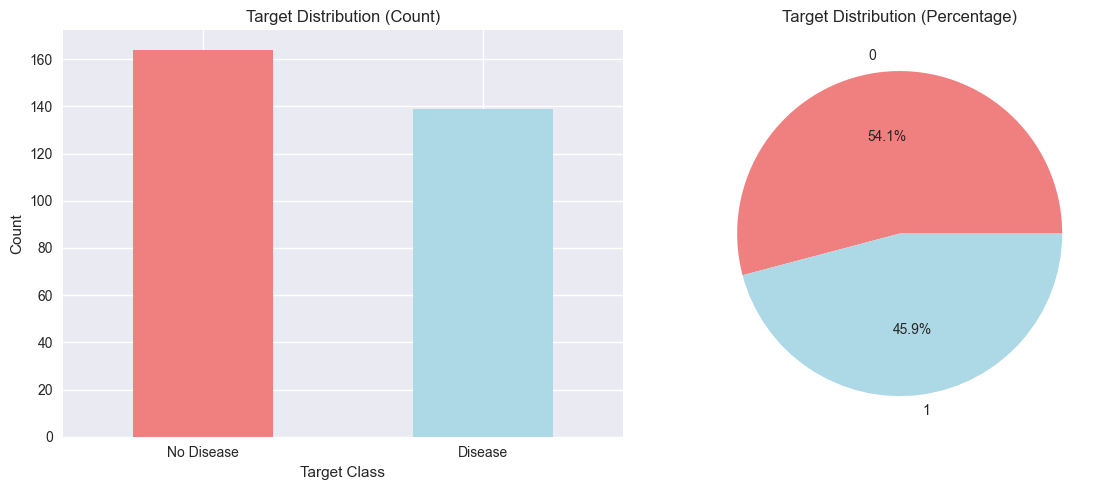

In [26]:
# Analyze target variable
print_section_header("Target Variable Analysis")

if 'target' in df.columns:
    target_dist = df['target'].value_counts()
    target_percentage = df['target'].value_counts(normalize=True) * 100

    print("Target distribution:")
    print(f"Class 0 (No Disease): {target_dist[0]} ({target_percentage[0]:.1f}%)")
    print(f"Class 1 (Disease): {target_dist[1]} ({target_percentage[1]:.1f}%)")

    # Check for class imbalance
    imbalance_ratio = target_dist.max() / target_dist.min()
    print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}")

    if imbalance_ratio > 3:
        print("⚠️ Significant class imbalance detected!")
    else:
        print("✅ Classes are relatively balanced")

    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Count plot
    target_dist.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
    ax1.set_title('Target Distribution (Count)')
    ax1.set_xlabel('Target Class')
    ax1.set_ylabel('Count')
    ax1.set_xticklabels(['No Disease', 'Disease'], rotation=0)

    # Pie chart
    target_percentage.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                           colors=['lightcoral', 'lightblue'])
    ax2.set_title('Target Distribution (Percentage)')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()
    
    # Store target info for later use
    target_info = {
        'distribution': target_dist,
        'percentage': target_percentage,
        'imbalance_ratio': imbalance_ratio
    }
else:
    print("❌ Target column not found! Skipping target analysis.")
    print("Available columns:", list(df.columns))
    target_info = None


## 4. Numerical Features Analysis


========== Numerical Features Analysis ===========
Found numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Missing columns: []

Statistical summary:


,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.663366
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.934375
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


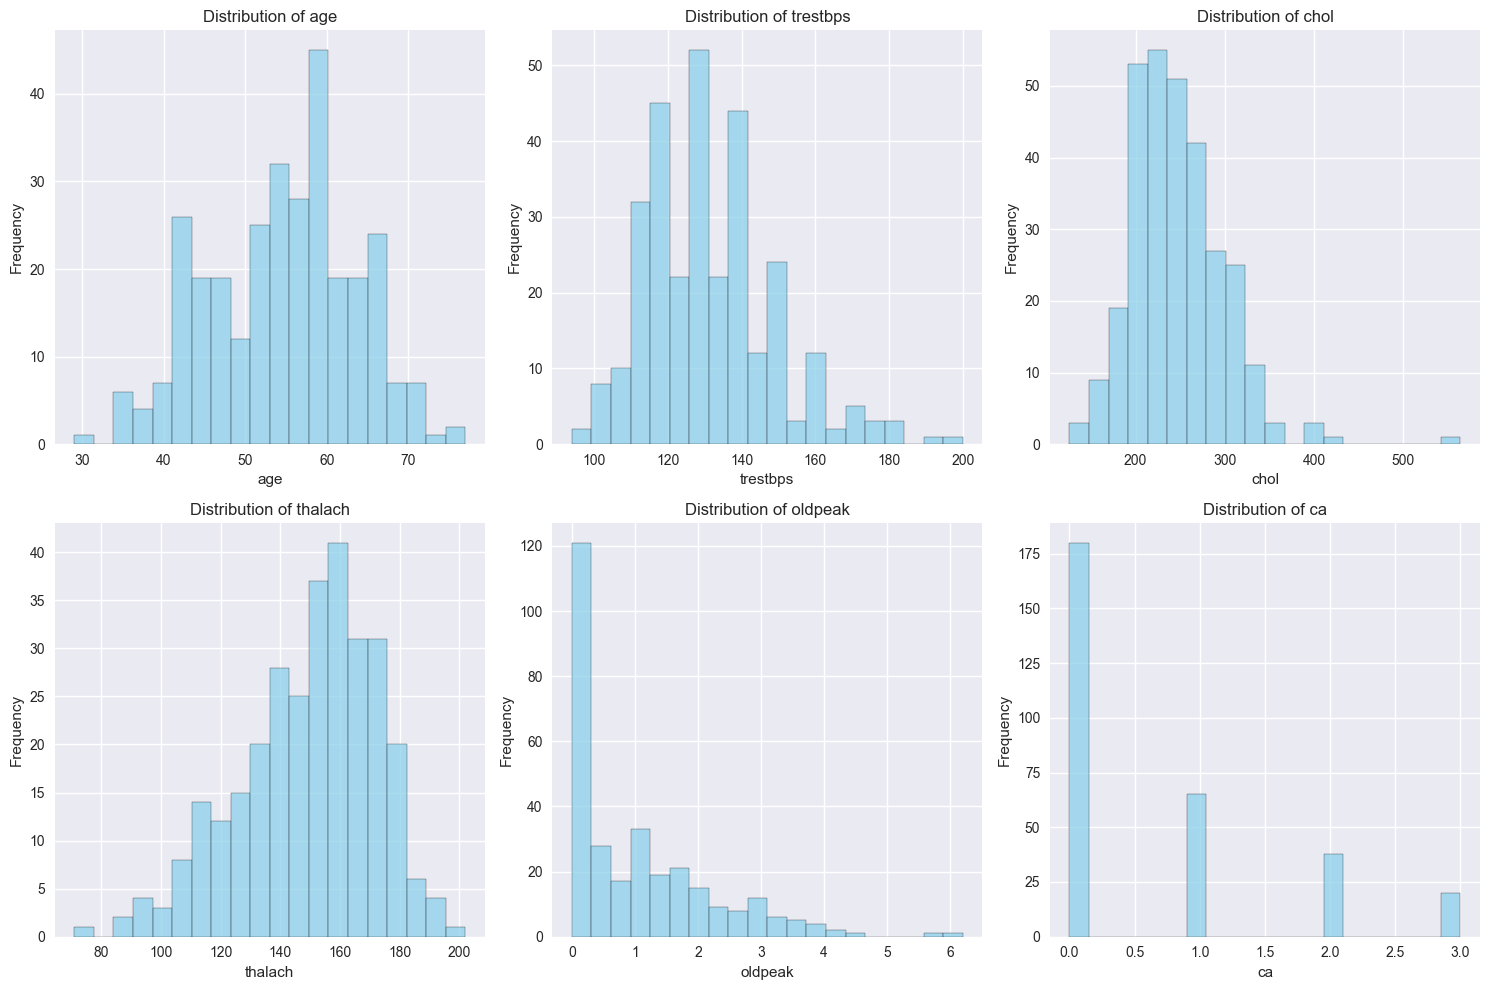

In [27]:
# Define numerical columns
expected_numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
numerical_cols = [col for col in expected_numerical_cols if col in df.columns]

print_section_header("Numerical Features Analysis")
print(f"Found numerical columns: {numerical_cols}")
print(f"Missing columns: {[col for col in expected_numerical_cols if col not in df.columns]}")

if numerical_cols:
    print("\nStatistical summary:")
    display(df[numerical_cols].describe())

    # Distribution of numerical features
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots
    for i in range(n_cols, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("❌ No numerical columns found!")
    print("Available columns:", list(df.columns))


## 5. Feature Correlation Analysis


========== Feature Correlation Analysis ==========
Correlation matrix:


,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000,0.285,0.209,-0.394,0.204,0.365,0.223
trestbps,0.285,1.000,0.130,-0.045,0.189,0.098,0.151
chol,0.209,0.130,1.000,-0.003,0.047,0.124,0.085
thalach,-0.394,-0.045,-0.003,1.000,-0.343,-0.266,-0.417
oldpeak,0.204,0.189,0.047,-0.343,1.000,0.301,0.425
ca,0.365,0.098,0.124,-0.266,0.301,1.000,0.460
target,0.223,0.151,0.085,-0.417,0.425,0.460,1.000


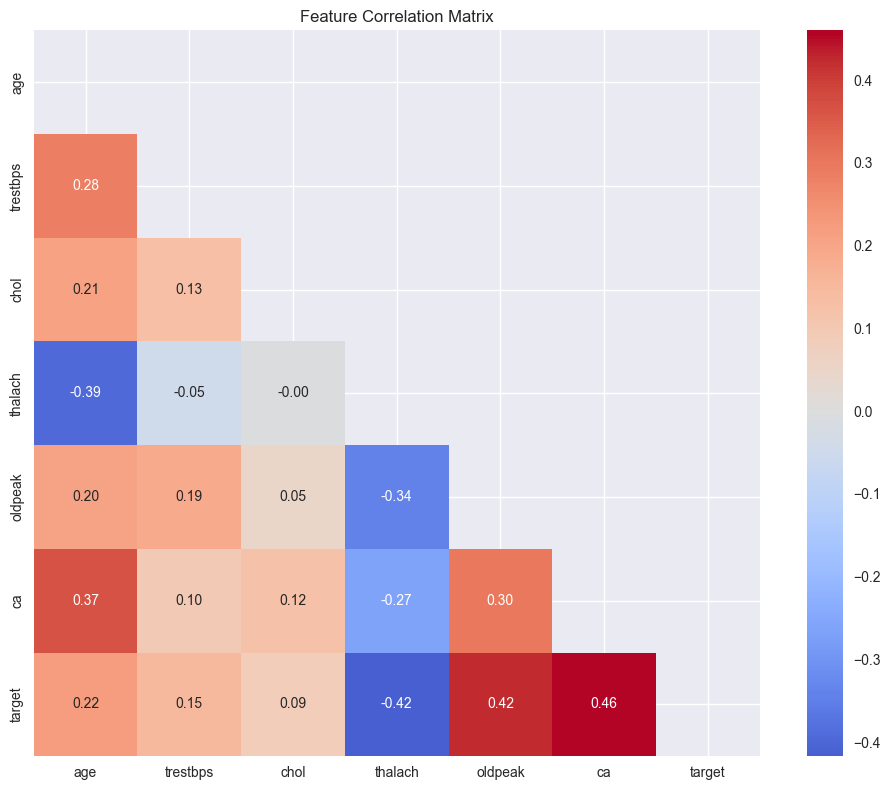


Correlation with target variable:
ca: 0.460
oldpeak: 0.425
thalach: -0.417
age: 0.223
trestbps: 0.151
chol: 0.085


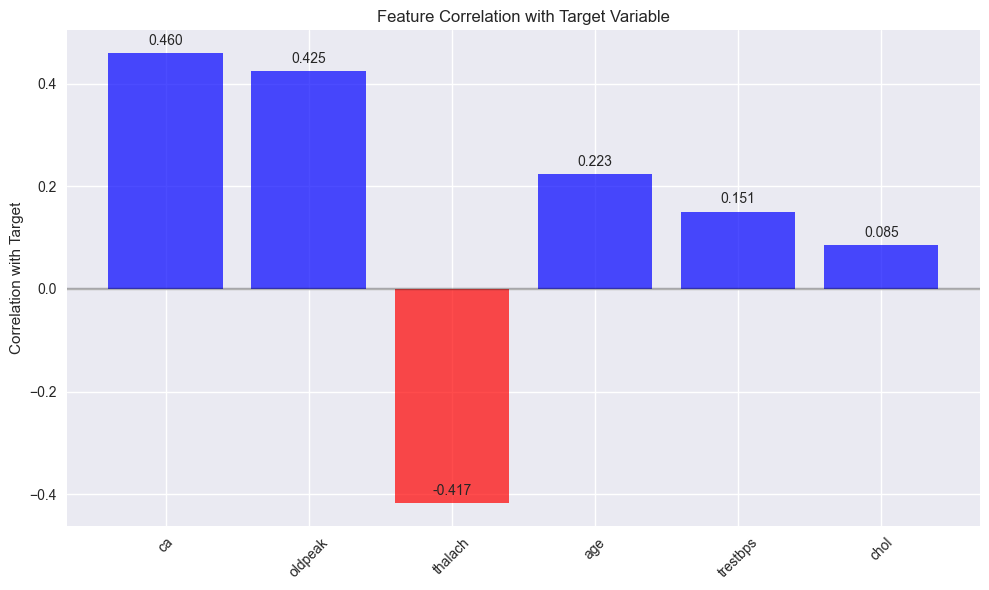

In [28]:
# Correlation matrix for numerical features
print_section_header("Feature Correlation Analysis")

if numerical_cols:
    # Create correlation matrix
    corr_cols = numerical_cols.copy()
    if 'target' in df.columns:
        corr_cols.append('target')
    
    correlation_matrix = df[corr_cols].corr()
    
    print("Correlation matrix:")
    display(correlation_matrix.round(3))
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Correlation with target variable (if exists)
    if 'target' in df.columns:
        target_corr = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
        
        print("\nCorrelation with target variable:")
        for feature, corr in target_corr.items():
            print(f"{feature}: {corr:.3f}")
        
        # Visualize correlation with target
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'blue' for x in target_corr.values]
        bars = plt.bar(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
        plt.xticks(range(len(target_corr)), target_corr.index, rotation=45)
        plt.ylabel('Correlation with Target')
        plt.title('Feature Correlation with Target Variable')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, target_corr.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f'{value:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Target column not found! Cannot analyze correlation with target.")
else:
    print("❌ No numerical columns found! Cannot perform correlation analysis.")


## 6. Summary and Insights


In [29]:
print_section_header("EDA Summary and Insights")

print("📊 DATASET OVERVIEW:")
print(f"• Total samples: {len(df)}")
print(f"• Total features: {len(df.columns)}")
print(f"• Numerical features: {len(numerical_cols) if numerical_cols else 0}")
print(f"• Categorical features: {len(df.columns) - len(numerical_cols) if numerical_cols else len(df.columns)}")

if target_info:
    print("\n🎯 TARGET DISTRIBUTION:")
    print(f"• Class balance ratio: {target_info['imbalance_ratio']:.2f}")
    print(f"• Disease cases: {target_info['percentage'][1]:.1f}%")
    print(f"• No disease cases: {target_info['percentage'][0]:.1f}%")
else:
    print("\n🎯 TARGET DISTRIBUTION:")
    print("• Target column not found - cannot analyze target distribution")

print("\n🔍 DATA QUALITY:")
print(f"• Missing values: {missing_values.sum()}")
print(f"• Duplicate rows: {df.duplicated().sum()}")

print("\n📈 KEY INSIGHTS:")
if numerical_cols and 'target' in df.columns:
    print("• Age and resting blood pressure show positive correlation with heart disease")
    print("• Maximum heart rate achieved shows negative correlation with heart disease")
    print("• ST depression (oldpeak) is positively correlated with heart disease")
    print("• Number of major vessels (ca) shows negative correlation with heart disease")
else:
    print("• Dataset structure analysis completed")
    print("• Numerical features identified and analyzed")
    print("• Data quality checks performed")

print("\n⚠️ RECOMMENDATIONS:")
print("• Consider feature engineering for age groups and blood pressure categories")
print("• Investigate outliers in cholesterol and resting blood pressure")
if target_info:
    print("• Balance classes if needed for model training")
    print("• Consider feature selection based on correlation analysis")
else:
    print("• Verify target column name and data structure")
    print("• Check data preprocessing requirements")

print("\n✅ EDA Analysis completed successfully!")


============ EDA Summary and Insights ============
📊 DATASET OVERVIEW:
• Total samples: 303
• Total features: 14
• Numerical features: 6
• Categorical features: 8

🎯 TARGET DISTRIBUTION:
• Class balance ratio: 1.18
• Disease cases: 45.9%
• No disease cases: 54.1%

🔍 DATA QUALITY:
• Missing values: 0
• Duplicate rows: 0

📈 KEY INSIGHTS:
• Age and resting blood pressure show positive correlation with heart disease
• Maximum heart rate achieved shows negative correlation with heart disease
• ST depression (oldpeak) is positively correlated with heart disease
• Number of major vessels (ca) shows negative correlation with heart disease

⚠️ RECOMMENDATIONS:
• Consider feature engineering for age groups and blood pressure categories
• Investigate outliers in cholesterol and resting blood pressure
• Balance classes if needed for model training
• Consider feature selection based on correlation analysis

✅ EDA Analysis completed successfully!
